# EDA Dataset Diamantes

En este notbeook, vamos a analizar el dataset que se nos entrega para realizar la predicción del precio de los diamantes.
En concreto, vamos a realizar los siguientes pasos:

- Análisis exploratorio del dataset. Ver qué datos nos vienen en el dataset.
- Identificación de outliers y correspondiente tratamiento.
- Correlación entre cada una de las características de los diamantes
- Otros: Eliminar características muy correlacionadas, creación de nuevas características, etc.


In [51]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#Cargamos el dataset
df = pd.read_csv('../data/train/diamonds_train.csv',index_col=[0])



## Estructura de los Datos:
Vamos a empezar viendo qué datos nos estamos trayendo:

In [52]:
df.head()

index_id  depth  table     x  \
0  5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1  41667f6e2629360aecaf00b20f8732e3310417ebd54b24...   61.6   58.0  6.40   
2  01f8667f50d52677bea23231a74156e4f92360d7bc3db6...   62.3   58.0  5.86   
3  c3867352aab641358faec75d733af012dbe2259a014ea8...   59.6   60.0  7.58   
4  0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...   60.2   62.0  5.40   

      y     z  price  carat      cut color clarity   city  
0  6.79  4.25   4268   1.21  Premium     J     VS2  Dubai  
1  6.35  3.93   3513   1.02  Premium     J     VS2  Dubai  
2  5.80  3.63   1792   0.77  Premium     J     VS2  Dubai  
3  7.48  4.49   7553   1.51  Premium     J     VS2  Dubai  
4  5.33  3.23   1176   0.57  Premium     J     VS2  Dubai

In [53]:
#Eliminamos la columna index_id, ya que no va a aportar ninguna información relevante para la predicción:
df.drop(labels='index_id', axis=1, inplace= True)

Un poco mas de información acerca de cada una de las columnas:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   depth    40455 non-null  float64
 1   table    40455 non-null  float64
 2   x        40455 non-null  float64
 3   y        40455 non-null  float64
 4   z        40455 non-null  float64
 5   price    40455 non-null  int64  
 6   carat    40455 non-null  float64
 7   cut      40455 non-null  object 
 8   color    40455 non-null  object 
 9   clarity  40455 non-null  object 
 10  city     40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


## Características Numéricas:

In [55]:
df.describe() 

depth         table             x             y             z  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean      61.752841     57.446133      5.729392      5.732819      3.537154   
std        1.431725      2.233535      1.124453      1.146650      0.697062   
min       43.000000     43.000000      0.000000      0.000000      0.000000   
25%       61.000000     56.000000      4.710000      4.720000      2.910000   
50%       61.800000     57.000000      5.690000      5.710000      3.520000   
75%       62.500000     59.000000      6.540000      6.540000      4.035000   
max       79.000000     95.000000     10.230000     58.900000      8.060000   

              price         carat  
count  40455.000000  40455.000000  
mean    3928.444469      0.797706  
std     3992.416147      0.475544  
min      326.000000      0.200000  
25%      945.000000      0.400000  
50%     2397.000000      0.700000  
75%     5331.000000      1.040000  
max    18823.000000      4.500000

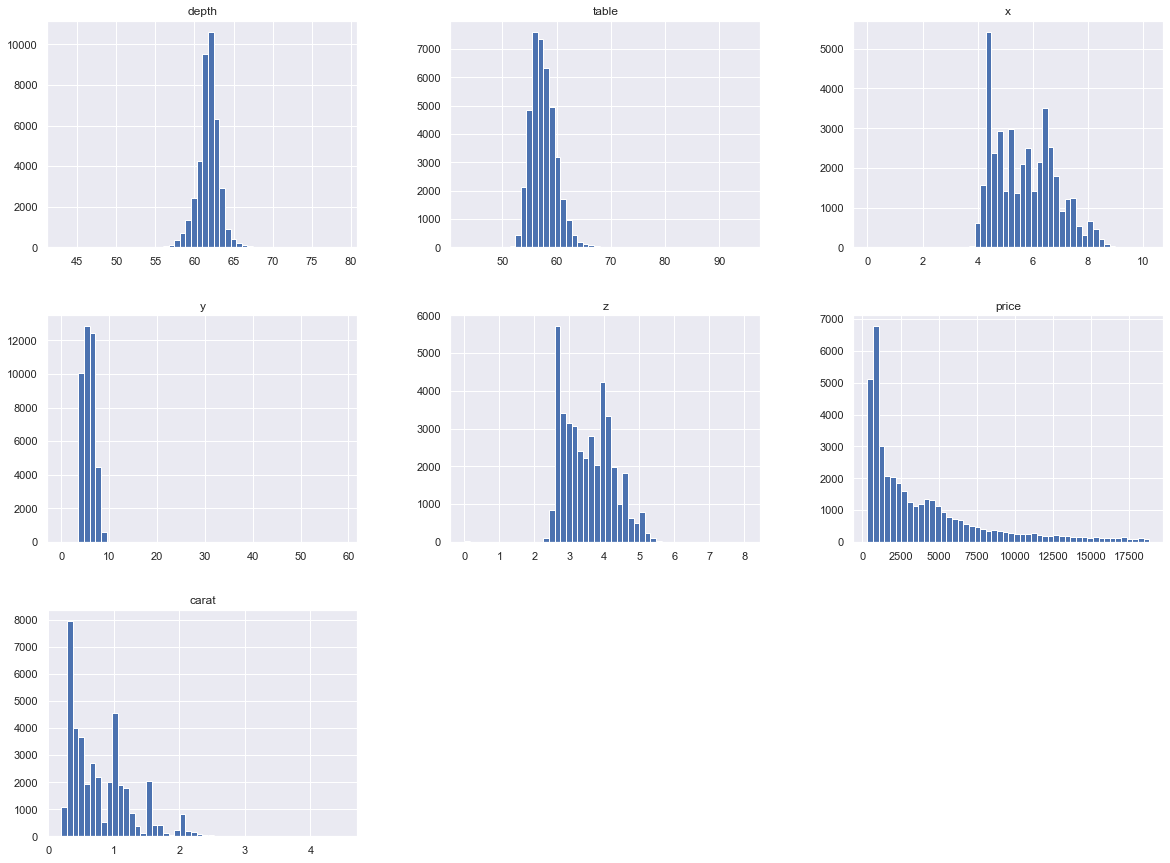

In [56]:
df.hist(bins=50, figsize = (20, 15))
plt.show()

Como vemos, el dataset no contiene ningún valor nulo, por lo que está perfecto para empezar nuestro EDA! 

Vamos a comenzar viendo la relación entre las características 'depth' y 'table':

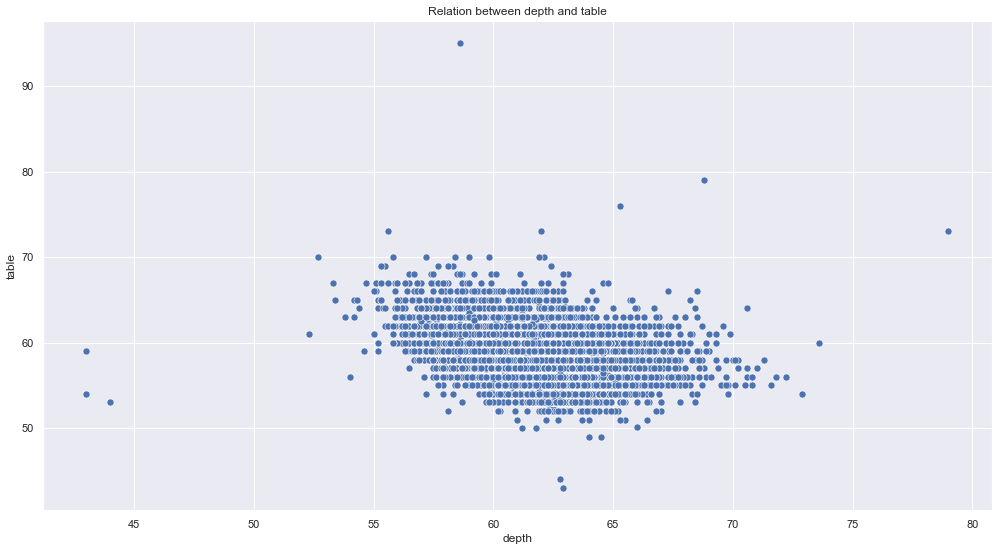

In [57]:
#Relation between depth and table
plt.figure(figsize=(17,9))
plt.title('Relation between depth and table')
sns.scatterplot(df['depth'],df['table'],s=50);

Podemos considerar como outliers los valores de depth < 50 y los de depth > 75. Además, los table < 50 y los table > 75, que son los que salen de los valores normales.

Pasamos a eliminarlos del dataset original:

In [58]:
df.drop(df[(df['depth']<50)|(df['depth']>75)].index, inplace= True)
df.drop(df[(df['table']<50)|(df['table']>75)].index, inplace= True)

Pasmos a ver ahora la relación entre cada una de las vriables numercias:

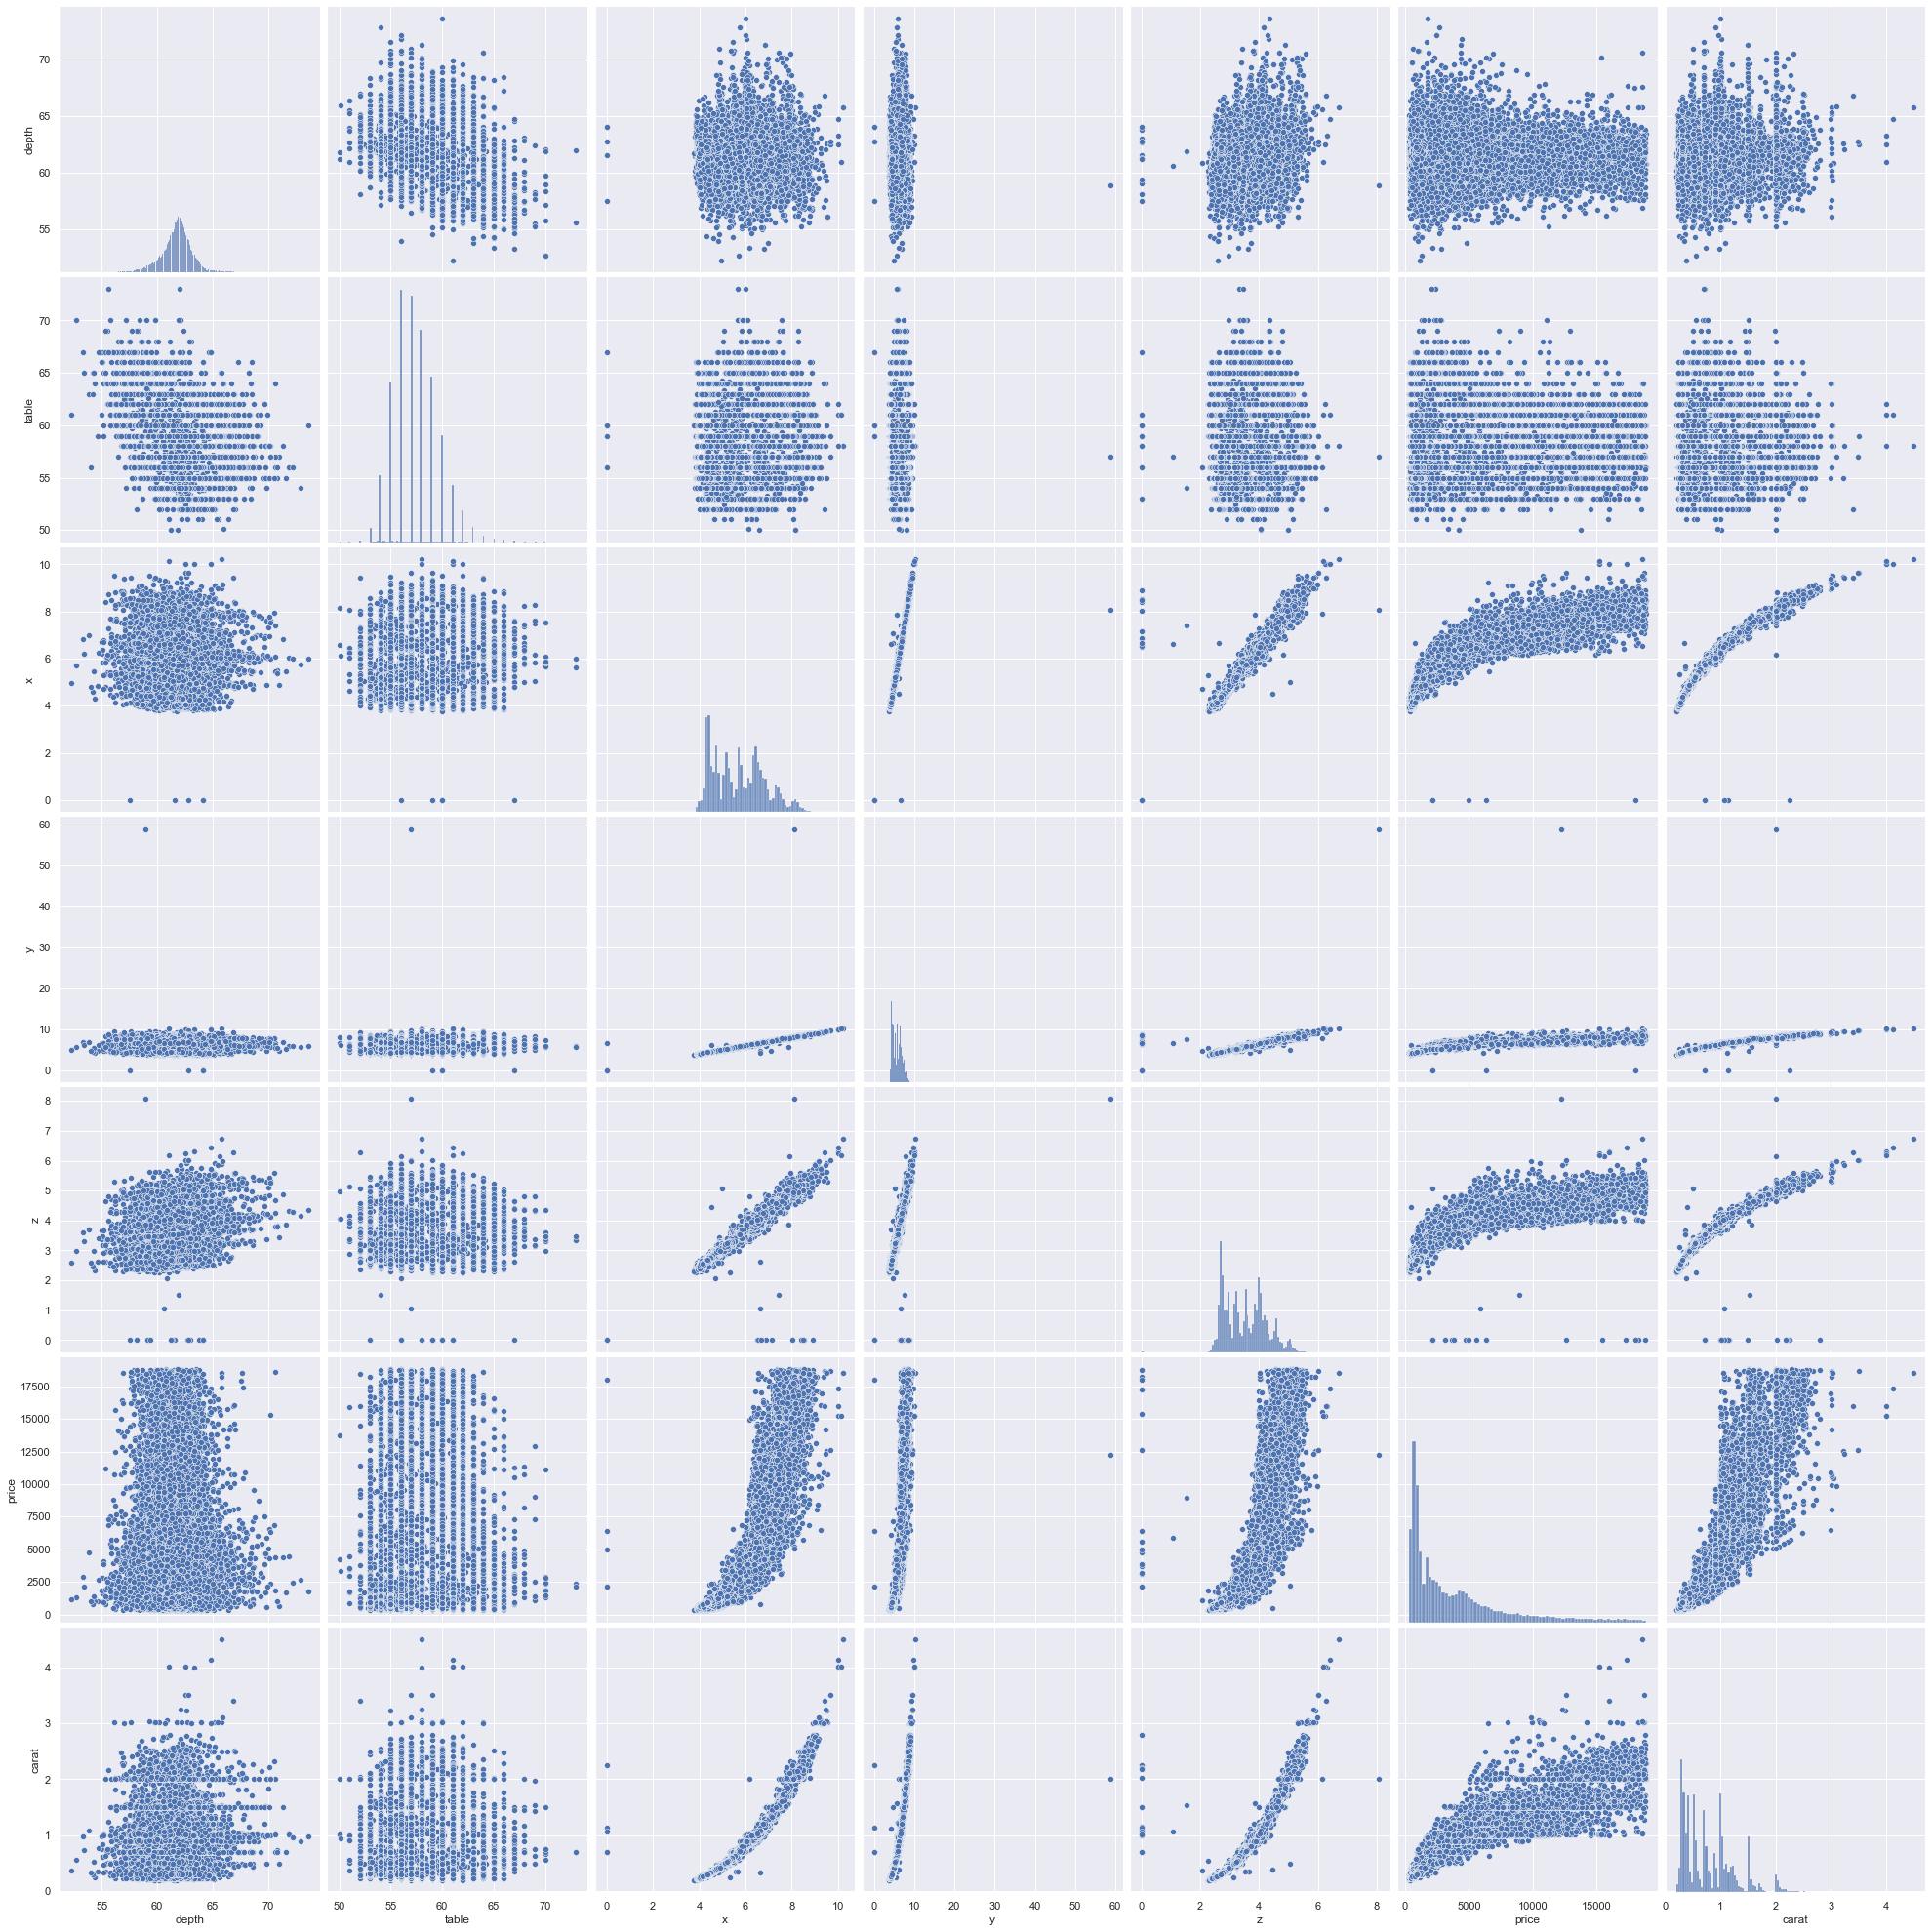

In [59]:
sns.pairplot(df,height=4);

Los outliers claramente son aquellos en los que tenemos valores de x, y, z = 0 (unas dimensiones no pueden ser nunca de 0). También hay algunos outliers d con valor de y > 20, z > 8 y z < 2.

Pasamos a eliminarlos de nuestro dataset:

In [60]:
df.drop(df[(df['x']==0)].index, inplace= True)
df.drop(df[(df['y']==0)|(df['y']>20)].index, inplace= True)
df.drop(df[(df['z']<2)|(df['z']>8)].index, inplace= True)


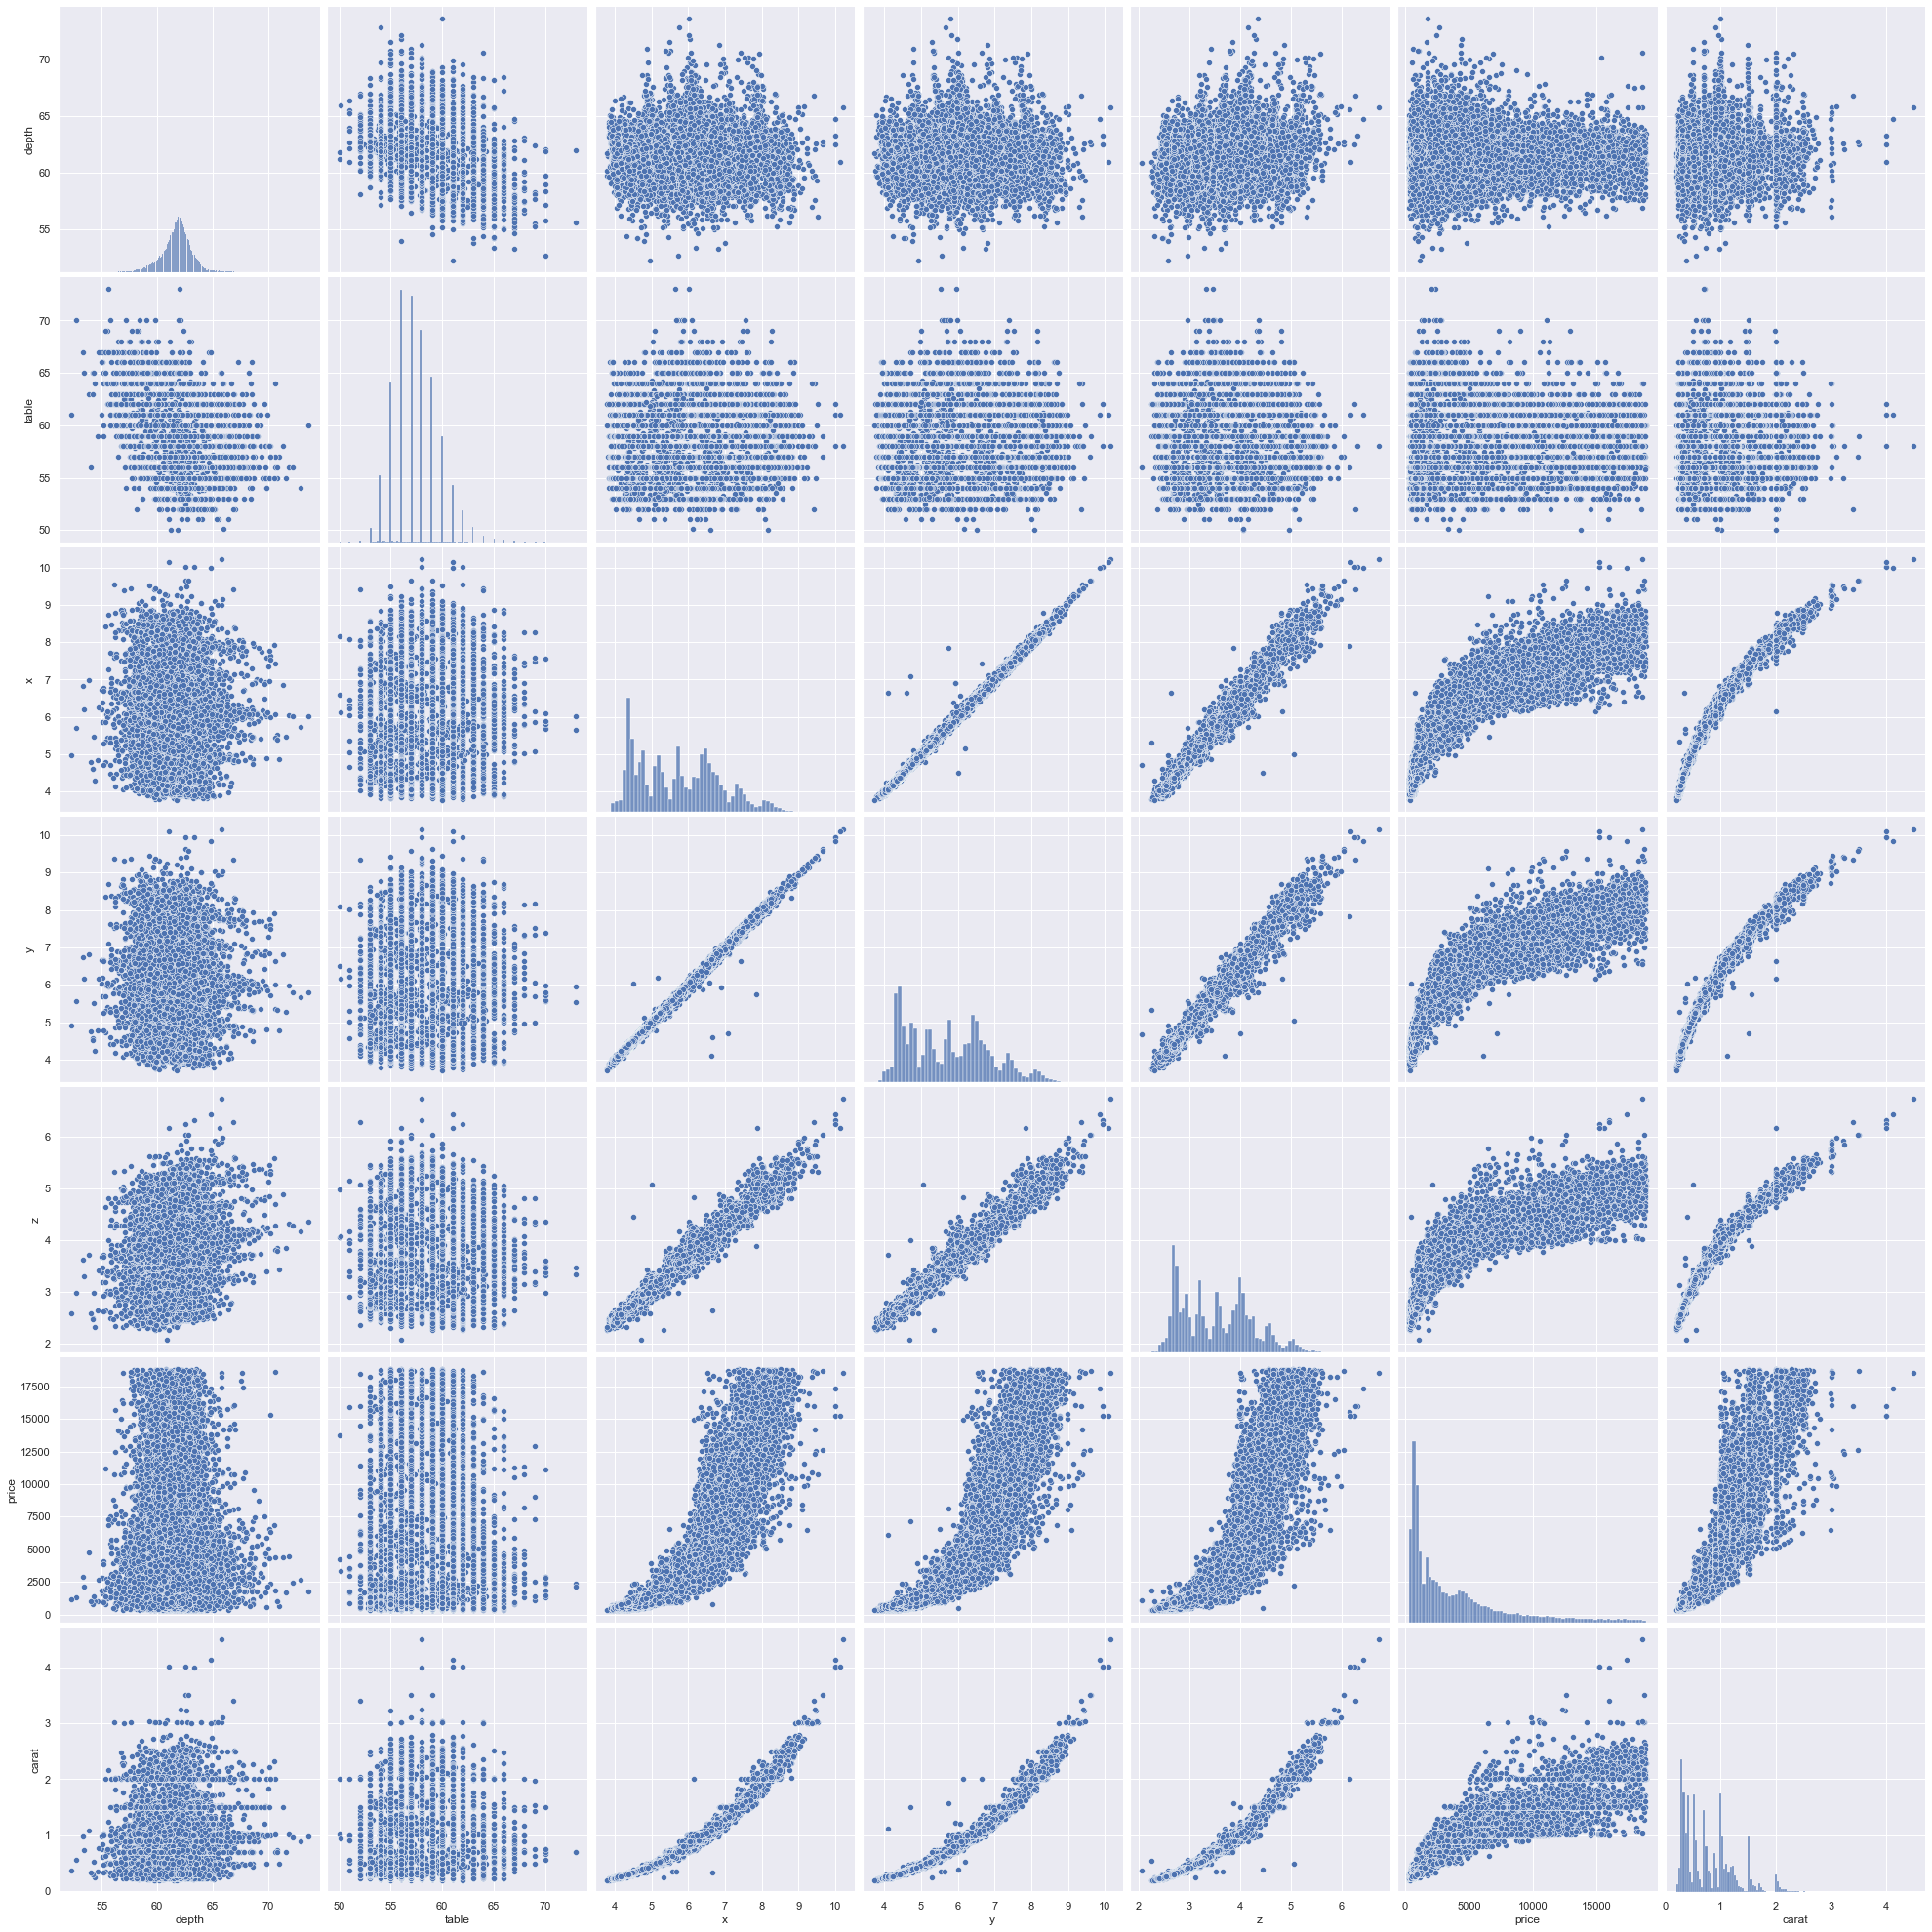

In [61]:
sns.pairplot(df,height=4);

Vemos que aunque podríamos considerar algunos valores más como outliers, pero todos los datos ya se corresponden a rangos mas o menos 'estables', por lo que decidimos no eliminar ningún valor más.

In [62]:
df.to_csv('../data/train/diamonds_train_cleaned.csv') #Guardamos el dataset con los outliers eliminados

[]

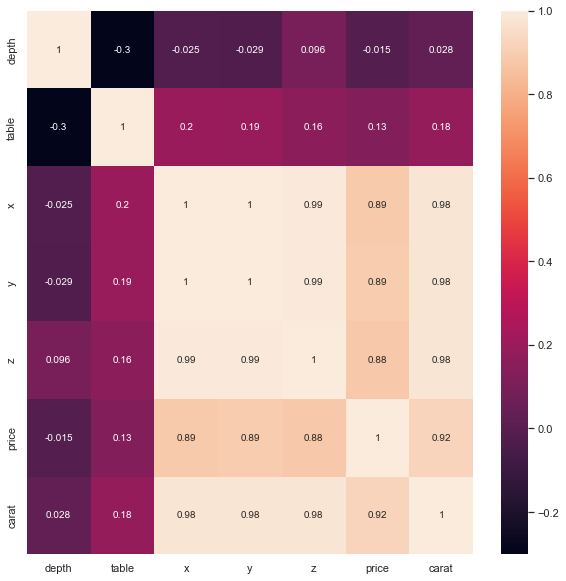

In [63]:
#Echamos un vistazo a la correlación entre características numéricas:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Vemos una correlación muy muy alta, prácticamente de 1 entre algunos de las características, por lo tanto tocará eliminar alguno de ellos (lo decidiremos más adelante). 

## Características categóricas:

Vamos a ver algunos gráficos mas que nos ayudarán a entender como están distribuidos los datos:

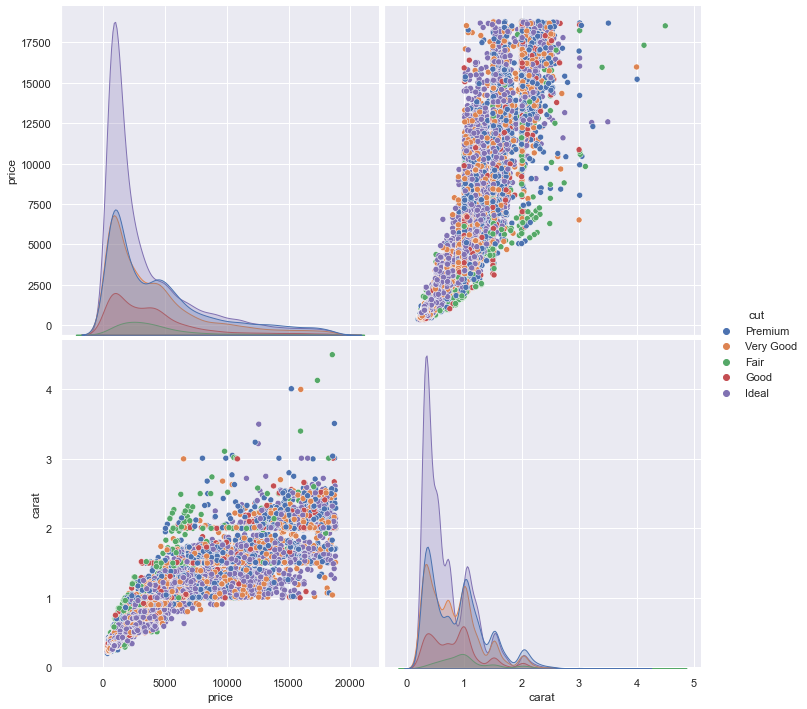

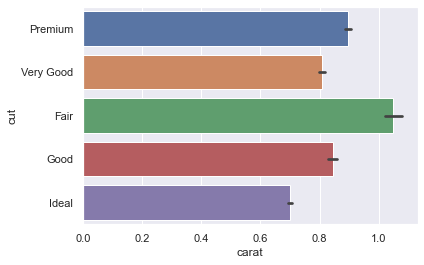

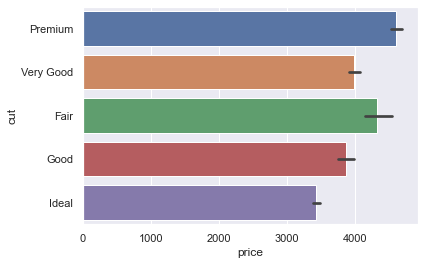

In [46]:
sns.pairplot(df[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df)
plt.show()
sns.barplot(x = "price", y = "cut", data = df)
plt.show()

Los cortes `'Fair'` son los más pesados, pero no son los diamantes más caros. Los cortes `'Premium'` pesan menos que los de 'Fair', pero cuestan más. Los cortes `'Ideales'` pesan mucho menos y son menos costosos. Por lo tanto, el corte se considera relativamente al determinar el precio del diamante.

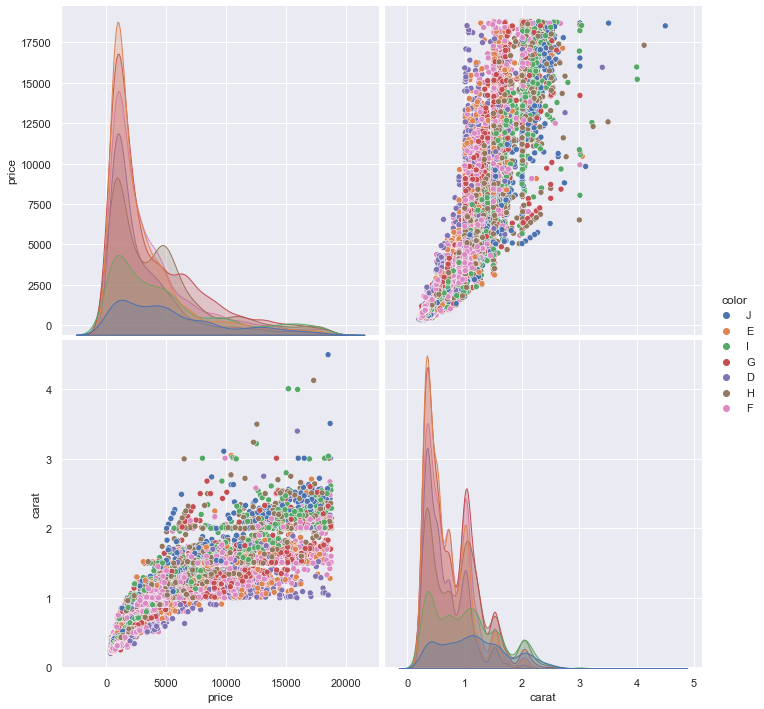

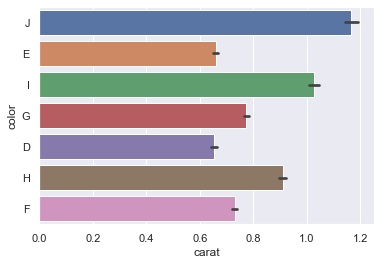

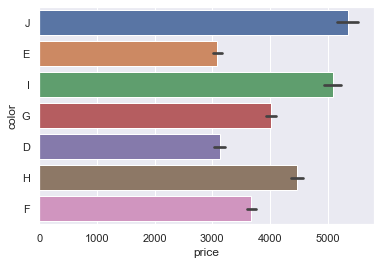

In [47]:
sns.pairplot(df[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df)
plt.show()
sns.barplot(x = "price", y = "color", data = df)
plt.show()

Aquí podemos ver que el color `J`, que es el más pesado, también es el más caro. Las últimas 2 gráficas son muy similares. Podríamos concluir que el color del diamante también depende mucho de su precio.

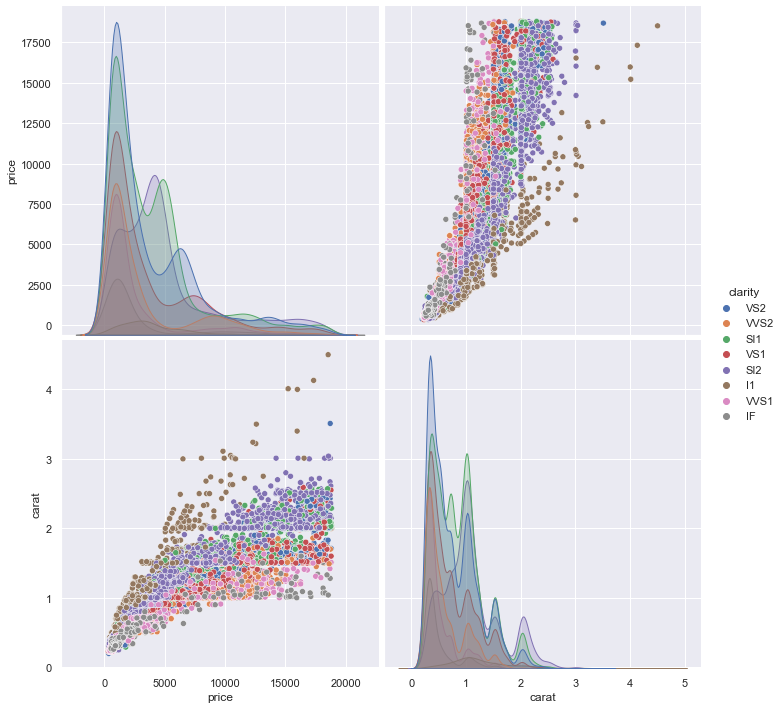

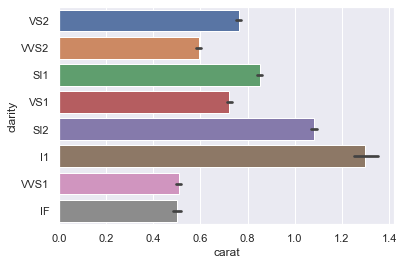

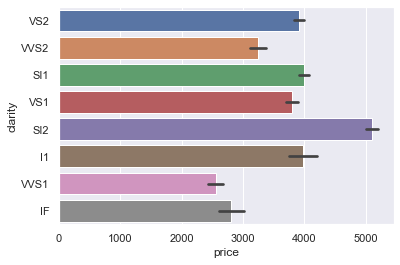

In [49]:
sns.pairplot(df[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(x = "carat", y = "clarity", data = df)
plt.show()
sns.barplot(x = "price", y = "clarity", data = df)
plt.show()

En este caso, podemos ver que `I1` no tiene la mayor claridad, aunque es el más caro. 

## Creando nuevas características:
Como acabamos de comentar que algunas de las características numéricas tienen entre si una correlación muy alta (y probablemente no nos va a ayudar a la hora de predecir), vamos a ver si la matriz de correlación mejora creando nuevas 'features':

In [64]:
df['xy'] = df['x']/df['y']
df['xz'] = df['x']/df['z']
df['zy'] = df['z']/df['y']
df['table_depth'] = df['depth']/df['table']
df['carat/dimensons'] = df ['carat'] / (df['x']* df['y'] * df['z'])
df.head()

depth  table     x     y     z  price  carat      cut color clarity   city  \
0   62.4   58.0  6.83  6.79  4.25   4268   1.21  Premium     J     VS2  Dubai   
1   61.6   58.0  6.40  6.35  3.93   3513   1.02  Premium     J     VS2  Dubai   
2   62.3   58.0  5.86  5.80  3.63   1792   0.77  Premium     J     VS2  Dubai   
3   59.6   60.0  7.58  7.48  4.49   7553   1.51  Premium     J     VS2  Dubai   
4   60.2   62.0  5.40  5.33  3.23   1176   0.57  Premium     J     VS2  Dubai   

         xy        xz        zy  table_depth  carat/dimensons  
0  1.005891  1.607059  0.625920     1.075862         0.006139  
1  1.007874  1.628499  0.618898     1.062069         0.006386  
2  1.010345  1.614325  0.625862     1.074138         0.006241  
3  1.013369  1.688196  0.600267     0.993333         0.005931  
4  1.013133  1.671827  0.606004     0.970968         0.006131

[]

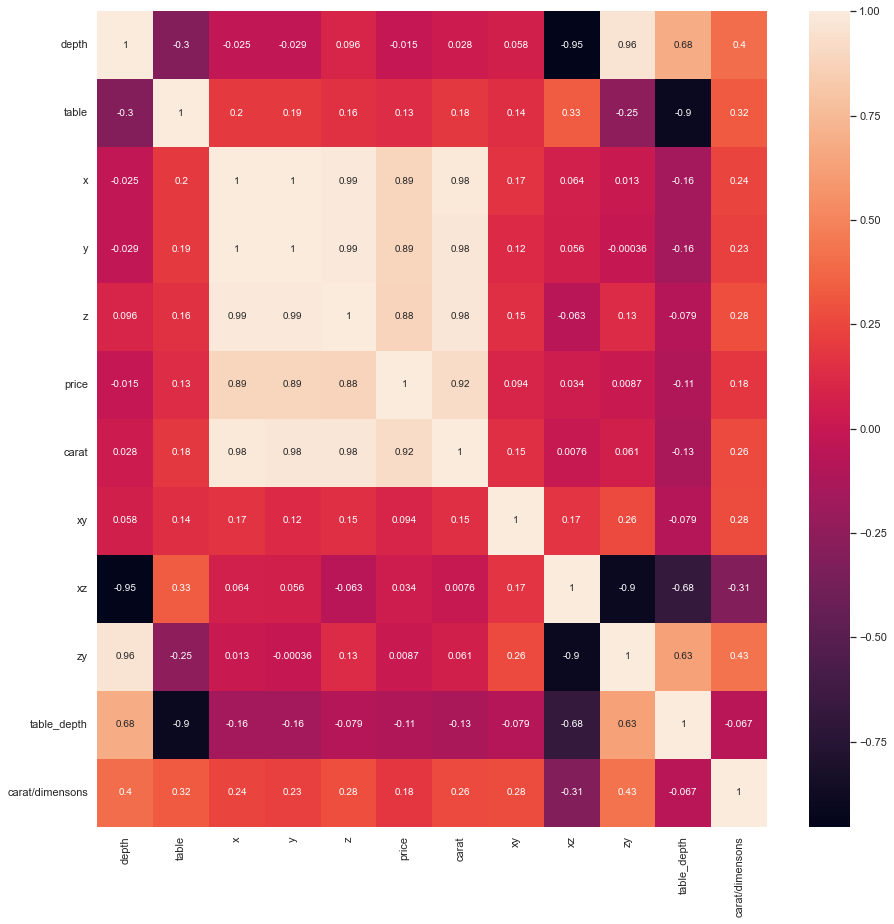

In [65]:
#Comprovamos de nuevos la correlación:

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Aparentemente, y basados en la matriz de correlación anterior, las nuevas características creadas son bastante buenas, al menos alguna de ellas, aportando poca correlación entre si (si aportan correlación al precio)

## Conclusiones:
Despues de analizar nuesro dataset y como afectan cada una de las características sobre el precio de estos, las acciones a tomar antes de llevar a cabo la predicción serán:

- Eliminar la columna 'depth' ya que aporta muy poca correlación al precio.
- Eliminar las dimensiones (x, y, z), ya que entre ellas hay una correlación de prácticamente 1, dejando la columna 'carat' que aporta la misma información, pero con mucho mas peso a la hora de calcular el precio.
- Creamos unas nuevas características que nos aportan bastante a la hora de calcular el precio.
- Todas las características categóricas, aportan bastante peso para el cálculo del precio del diamante, por lo que no eliminaremos ninguna.